In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
advertising = pd.read_csv('advertising.csv')

In [4]:
advertising.shape

(200, 4)

In [6]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


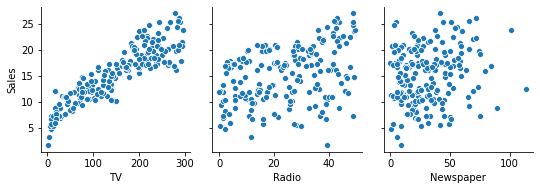

In [8]:
sns.pairplot(data=advertising,x_vars=['TV','Radio','Newspaper'],y_vars=['Sales'])

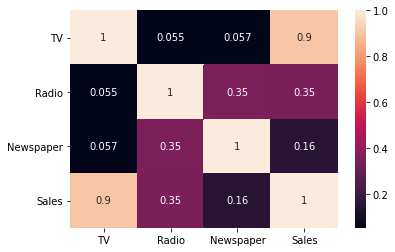

In [10]:
sns.heatmap(data=advertising.corr(),annot=True)

In [11]:
#create x and y 
X = advertising['TV']
y = advertising['Sales']

In [13]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)

In [17]:
X_train.shape

(140,)

In [23]:
# reshape (140,) to (140,1){ X _train.reshape(-1,1) here -1 tells that ignore number of rows and i just want 1 column
X_train_lm = X_train.values.reshape(-1,1)
X_test_lm = X_test.values.reshape(-1,1)
X_train_lm.shape,X_test_lm.shape

((140, 1), (60, 1))

In [24]:
# steps in sklearn model building

# 1. create an object for linear regression
lm = LinearRegression()
# 2. fit the model
lm.fit(X_train_lm,y_train)

LinearRegression()

In [27]:
# 3. see the params, make the predictions (train,test)
print("Coefficient :",lm.coef_)
print("Intercept :",lm.intercept_)

Coefficient : [0.05454575]
Intercept : 6.948683200001357


In [33]:
# make predictions 
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)
y_test_pred

array([ 7.37414007, 19.94148154, 14.32326899, 18.82329361, 20.13239168,
       18.2287449 , 14.54145201, 17.72692398, 18.75238413, 18.77420243,
       13.34144544, 19.46693349, 10.01415451, 17.1923756 , 11.70507285,
       12.08689312, 15.11418241, 16.23237035, 15.8669138 , 13.1068987 ,
       18.65965635, 14.00690363, 17.60692332, 16.60328147, 17.03419291,
       18.96511257, 18.93783969, 11.05597839, 17.03419291, 13.66326538,
       10.6796127 , 10.71234015, 13.5487193 , 17.22510305,  9.67597085,
       13.52144643, 12.25053038, 16.13418799, 19.07965865, 17.48692266,
       18.69783838, 16.53237199, 15.92145955, 18.86693021, 13.5050827 ,
       11.84143724,  7.87050642, 20.51966653, 10.79961336,  9.03233096,
       17.99419817, 16.29237067, 11.04506924, 14.09963141, 18.44147334,
        9.3759692 ,  7.88687015,  8.34505447, 17.72692398, 11.62325422])

In [32]:
# 4. evaluate the model
print(r2_score(y_true = y_train,y_pred=y_train_pred))
print(r2_score(y_true = y_test,y_pred=y_test_pred))

0.8157933136480389
0.7921031601245662
